In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

In [2]:
%load_ext autoreload
%autoreload 2

# Task 3: Forecast Future Market Trends

This notebook uses the trained model from Task 2 to forecast Tesla (TSLA) stock prices for the next 12 months. We'll:
- Load and preprocess TSLA data.
- Generate a 12-month forecast with confidence intervals.
- Visualize and analyze trends, volatility, and risks.

In [3]:
from src.data_loader import DataLoader
from src.data_preprocessor import DataPreprocessor
from src.forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
loader = DataLoader(['TSLA'])
raw_data = loader.load_data()
preprocessor = DataPreprocessor(raw_data)
cleaned_data = preprocessor.clean_data()
tsla_data = cleaned_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



## Step 1: Train and Forecast
Train the ARIMA model and forecast 252 trading days (~12 months).

In [5]:
# Initialize Forecaster
forecaster = Forecaster(tsla_data, ticker='TSLA', test_size=0.2)

In [6]:
# Train and forecast using ARIMA
forecast, conf_int = forecaster.forecast_arima(optimize=True, steps=252)

c:\Users\Temp\Desktop\KAI-Projects\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Temp\Desktop\KAI-Projects\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Temp\Desktop\KAI-Projects\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Temp\Desktop\KAI-Projects\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'f

## Step 2: Visualize Forecast
Plot historical data, forecast, and confidence intervals.

In [7]:
# Generate future dates
future_dates = pd.date_range(start=tsla_data['Date'].iloc[-1], periods=253, freq='B')[1:]

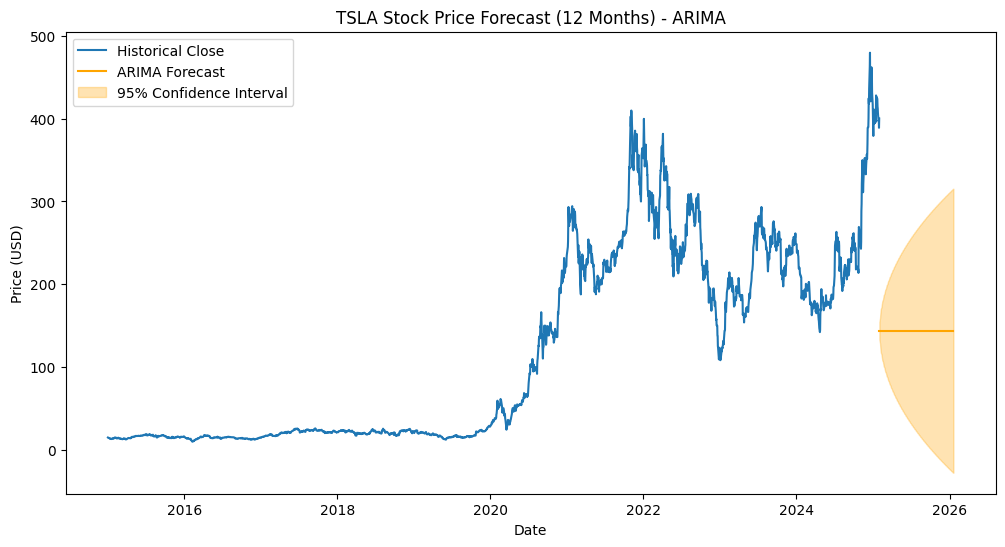

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Date'], tsla_data['Close'], label='Historical Close')
plt.plot(future_dates, forecast, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, conf_int['lower'], conf_int['upper'], color='orange', alpha=0.3, label='95% Confidence Interval')
plt.title('TSLA Stock Price Forecast (12 Months) - ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
plt.savefig('../images/tsla_future_forecast_arima.png')

## Step 3: Forecast Analysis
### Trend Analysis
- **Long-term Trend**: Observe the forecast slope (upward, downward, or stable).
- **Patterns**: Note any recurring behaviors or anomalies.

### Volatility and Risk
- **Confidence Intervals**: Wider intervals indicate higher uncertainty.
- **Volatility Periods**: Identify where intervals expand significantly.

### Market Opportunities and Risks
- **Opportunities**: Potential price increases for investment.
- **Risks**: High volatility or declines to watch for.

In [9]:
# Trend analysis
trend_slope = (forecast.iloc[-1] - forecast.iloc[0]) / len(forecast)
trend_direction = "upward" if trend_slope > 0 else "downward" if trend_slope < 0 else "stable"
print(f"Trend Direction: {trend_direction} (Slope: {trend_slope:.2f})")

Trend Direction: stable (Slope: 0.00)


In [12]:
# Volatility analysis
ci_width = conf_int['upper'] - conf_int['lower']
max_volatility_date = ci_width.idxmax()
print(f"Max Volatility Date: {max_volatility_date}, CI Width: {ci_width.max():.2f}")

Max Volatility Date: 2279, CI Width: 343.40


In [14]:
# Opportunities and risks
price_change = forecast.iloc[-1] - tsla_data['Close'].iloc[-1].item()  # Use .item() to get scalar
print(f"Debug: price_change type: {type(price_change)}, value: {price_change}")
if price_change > 0:
    print(f"Opportunity: Potential price increase of {price_change:.2f} USD by {future_dates[-1]}")
else:
    print(f"Risk: Potential price decline of {abs(price_change):.2f} USD by {future_dates[-1]}")

Debug: price_change type: <class 'numpy.float64'>, value: -256.5299987792969
Risk: Potential price decline of 256.53 USD by 2026-01-19 00:00:00
